# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

In [1]:
'''Todas las variables enumeradas a continuacion considero que son aquellas que harían fluctuar el precio de una propiedad.'''
tasar = 'Considero importante los siguientes datos para tasar una propiedad'
 
caracteristicas = 'Localizacion de la propiedad: Pais, ciudad, barrio','Tipo de propiedad','Avenida, Calle','Superficie total','M2 cubiertos', 'Cantidad de habitaciones', 'Cantidad de baños', 'Jardin', 'Antiguedad de la propiedad', 'Piscina','Piso del departamento', 'Cantidad de departamentos por piso', 'Cochera', 'Amenities','Metros de jardin o espacios verdes', 'Seguridad'
print(tasar)
for i, caracteristicas in enumerate(caracteristicas):
    print(i, caracteristicas)

Considero importante los siguientes datos para tasar una propiedad
0 Localizacion de la propiedad: Pais, ciudad, barrio
1 Tipo de propiedad
2 Avenida, Calle
3 Superficie total
4 M2 cubiertos
5 Cantidad de habitaciones
6 Cantidad de baños
7 Jardin
8 Antiguedad de la propiedad
9 Piscina
10 Piso del departamento
11 Cantidad de departamentos por piso
12 Cochera
13 Amenities
14 Metros de jardin o espacios verdes
15 Seguridad


---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import scipy as sp

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
'''IMPORTAMOS DATA'''
properties = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properties.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
'''IDENTIFICAMOS DUPLICADOS'''
duplicate_rows_df = properties[properties.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (2358, 19)


In [5]:
'''ELIMINAMOS DUPLICADOS'''
properties = properties.drop_duplicates()

In [6]:
'''QUITAMOS COLUMNAS INNECESARIAS.
CAMBIAMOS NOMBRE A LAS COLUMNAS'''
propiedades = properties.drop(['start_date', 'end_date','created_on', 'title', 'description'], axis = 1)
propiedades = propiedades.rename(columns={'l1': 'country','l2':'zone','l3':'neighborhood'})
#propiedades.head()

In [7]:

'''IDENTIFICAMOS CANTIDAD DE FILAS POR VARIABLE'''
propiedades.count()

lat                134730
lon                134696
country            144302
zone               144302
neighborhood       144302
rooms              144302
bedrooms           144302
bathrooms          138378
surface_total      124041
surface_covered    122963
price              144302
currency           144302
property_type      144302
operation_type     144302
dtype: int64

In [8]:
'''NULLS EN EL DATAFRAME'''
propiedades.isna().sum()/propiedades.shape[0]*100

lat                 6.633311
lon                 6.656872
country             0.000000
zone                0.000000
neighborhood        0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           4.105279
surface_total      14.040692
surface_covered    14.787737
price               0.000000
currency            0.000000
property_type       0.000000
operation_type      0.000000
dtype: float64

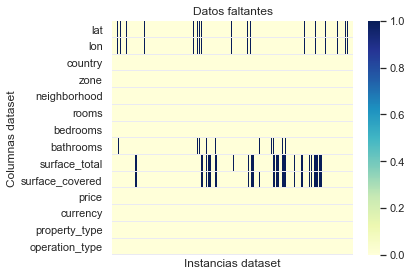

In [9]:
'''
PARA VISUALIZAR MEJOR LOS NULL VALUES
OBSERVAMOS QUE GRAN PARTE DE ELLOS SE ENCUENTRAN A LA DERECHA SI LO VIERAMOS EN UNA DISTRIBUCION
'''

dat = propiedades.isnull()
heat=sns.heatmap(dat.T, cmap='YlGnBu',xticklabels=False)
plt.title('Datos faltantes')
plt.xlabel('Instancias dataset')
plt.ylabel('Columnas dataset')
plt.tight_layout()

In [10]:
'''TENGO MUCHOS DATOS CON SUPERFICIE INCORRECTA, HABRIA QUE VER XQ, DE QUE TIPO DE PROPIEDADES SON Y SI SE PUEDEN CAMBIAR
ME GUSTARÍA QUE LOS QUE TIENE SUP CUB MAYOR A LA TOTAL, IGUALARLES LA SUP CUB A LA TOTAL
ESTARIA MAL IGUALAR LAS SUPERFICIES CUB A LAS TOTALES?'''
#propiedades[propiedades.surface_covered >= propiedades.surface_total].groupby('property_type').count()

'TENGO MUCHOS DATOS CON SUPERFICIE INCORRECTA, HABRIA QUE VER XQ, DE QUE TIPO DE PROPIEDADES SON Y SI SE PUEDEN CAMBIAR\nME GUSTARÍA QUE LOS QUE TIENE SUP CUB MAYOR A LA TOTAL, IGUALARLES LA SUP CUB A LA TOTAL\nESTARIA MAL IGUALAR LAS SUPERFICIES CUB A LAS TOTALES?'

In [11]:
'''FILTRAMOS DEL DATASET AQUELLAS PROPIEDADES CON MAYOR SUP CUB A SUP TOTAL
REEMPLAZAMOS LOS NULL VALUES IDENTIFICADOS POR LA MEDIA DE ESA VARIABLE POR BARRIO
QUITAMOS NULL VALUES'''
#propiedades = propiedades[propiedades.surface_covered <= propiedades.surface_total]
propiedades['surface_covered'].fillna(propiedades.groupby(['zone','property_type','neighborhood','rooms'])['surface_covered'].transform(pd.Series.mean), inplace = True)
propiedades['surface_total'].fillna(propiedades.groupby(['zone','property_type','neighborhood','rooms'])['surface_total'].transform(pd.Series.mean), inplace = True)
propiedades['bathrooms'].fillna(propiedades.groupby(['zone','property_type','neighborhood','rooms'])['bathrooms'].transform(pd.Series.mean).round(0), inplace = True)
propiedades.dropna(inplace=True)

In [12]:
propiedades.isnull().sum()

lat                0
lon                0
country            0
zone               0
neighborhood       0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
currency           0
property_type      0
operation_type     0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='zone'>

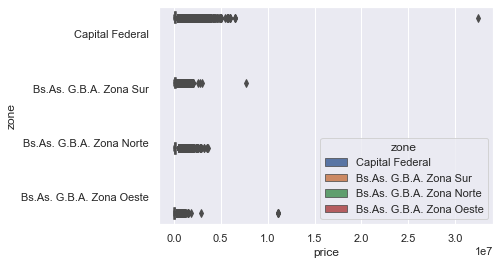

In [13]:
'''REALIZAMOS BOXPLOT DEL PRECIO PARA IDENTIFICAR SI TENEMOS OUTLYARS. '''
propiedades_outlayer = propiedades
sns.boxplot(x = 'price',y='zone', hue = 'zone', data = propiedades_outlayer)

<AxesSubplot:xlabel='surface_total', ylabel='zone'>

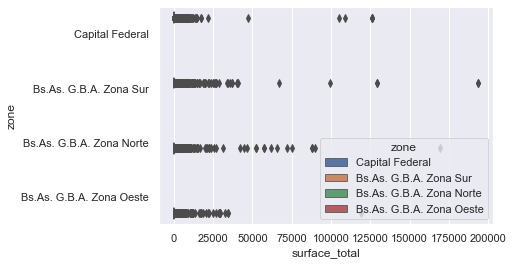

In [14]:
'''REALIZAMOS BOXPLOT DE LA SUPERFICIE TOTAL Y ZONA PARA IDENTIFICAR SI TENEMOS OUTLYARS. '''
sns.boxplot(x = 'surface_total',y='zone', hue = 'zone', data = propiedades_outlayer)

In [15]:
'''QUITAMOS VALORES ATIPICOS'''
Q1 = propiedades.quantile(0.25).round(2)
Q3 = propiedades.quantile(0.75).round(2)
IQR = Q3 - Q1
print(IQR)
propiedades = propiedades[~((propiedades < (Q1 - 1.5 * IQR)) |(propiedades > (Q3 + 1.5 * IQR))).any(axis=1)]

lat                     0.06
lon                     0.09
rooms                   2.00
bedrooms                2.00
bathrooms               1.00
surface_total          91.00
surface_covered        63.38
price              150000.00
dtype: float64


<AxesSubplot:xlabel='price', ylabel='zone'>

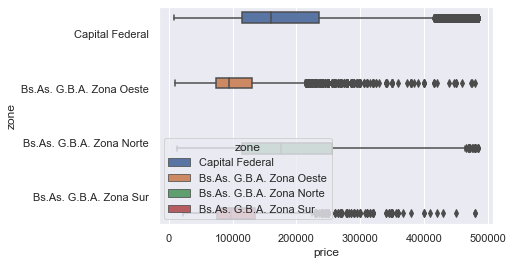

In [16]:
'''OBSERVAMOS QUE LUEGO DE QUITAR VALORES ATIPICOS SE PUEDE VISUALIZAR DE UNA MEJOR MANERA LOS GRAFICOS.
EN EL SIGUIENTE GRAFICO VISUALIZAMOS BOXPLOT DE ZONA Y PRECIO'''
sns.boxplot(data = propiedades, x='price',y = 'zone', hue= 'zone')

<AxesSubplot:xlabel='surface_total', ylabel='zone'>

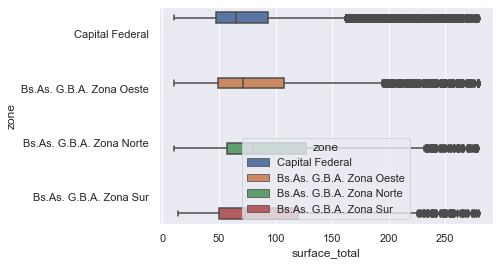

In [17]:
'''EN EL SIGUIENTE GRAFICO VISUALIZAMOS BOXPLOT DE ZONA Y PRECIO'''
sns.boxplot(data = propiedades, x='surface_total',y = 'zone', hue= 'zone')

In [18]:
#CONOCEMOS NUESTRO DATASET

In [19]:
'''ESTADISTICOS'''
propiedades.describe().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,90229.00,90229.00,90229.00,90229.00,90229.00,90229.00,90229.00,90229.00
mean,-34.60,-58.45,2.74,1.78,1.35,78.78,67.28,176819.52
std,0.03,0.05,1.05,0.90,0.57,44.40,32.97,91329.08
min,-34.72,-58.63,1.00,0.00,1.00,10.00,1.00,7500.00
25%,-34.62,-58.48,2.00,1.00,1.00,48.00,43.00,108900.00
50%,-34.60,-58.44,3.00,2.00,1.00,66.00,60.00,155000.00
75%,-34.58,-58.41,3.00,2.00,2.00,96.00,82.00,226000.00
max,-34.48,-58.28,7.00,6.00,3.00,279.00,205.00,485000.00


<AxesSubplot:>

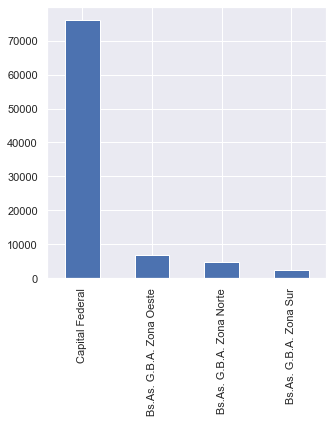

In [20]:
'''CANTIDAD DE PROPIEDADES POR ZONAS'''
propiedades.zone.value_counts().plot(kind='bar', figsize=(5,5))

In [21]:
'''MEDIA DE PRECIOS POR ZONA'''
propiedades.groupby('zone')['price'].mean()

zone
Bs.As. G.B.A. Zona Norte    192253.859605
Bs.As. G.B.A. Zona Oeste    110205.437167
Bs.As. G.B.A. Zona Sur      113195.085703
Capital Federal             183885.335044
Name: price, dtype: float64

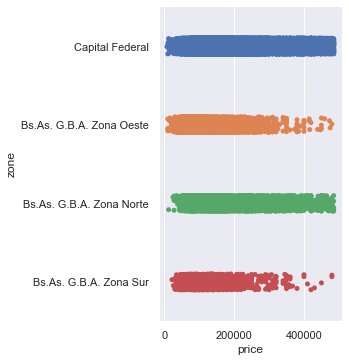

In [22]:
'''PRECIO POR ZONAS'''
sns.catplot(data = propiedades, y ='zone', x ='price')

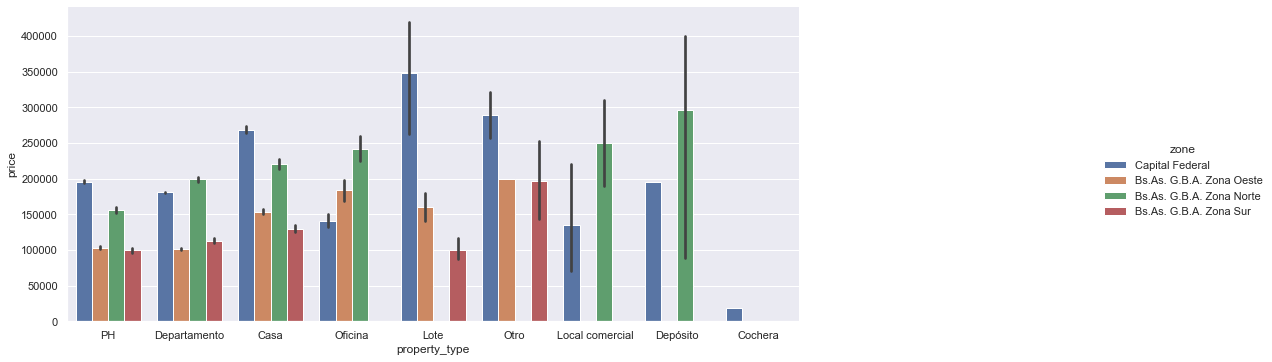

In [23]:
'''PRECIO POR TIPO DE PROPIEDAD POR ZONAS'''
j = sns.catplot(x="property_type", y="price", hue="zone", data=propiedades, kind="bar")
j.fig.set_figwidth(20)

In [24]:
'''MEDIA DE SUPERFICIE POR ZONA'''
propiedades.groupby('zone')['surface_total'].mean()

zone
Bs.As. G.B.A. Zona Norte    98.906783
Bs.As. G.B.A. Zona Oeste    90.002852
Bs.As. G.B.A. Zona Sur      92.724485
Capital Federal             76.063938
Name: surface_total, dtype: float64

In [25]:
'''
CAPITAL FEDERAL TIENEN LA MAYOR CANTIDAD DE PROPIEDADES,
SON PROPIEDADES MAS CHICAS A UN MAYOR PRECIO
'''
propiedades.groupby('zone')['price'].mean()

zone
Bs.As. G.B.A. Zona Norte    192253.859605
Bs.As. G.B.A. Zona Oeste    110205.437167
Bs.As. G.B.A. Zona Sur      113195.085703
Capital Federal             183885.335044
Name: price, dtype: float64

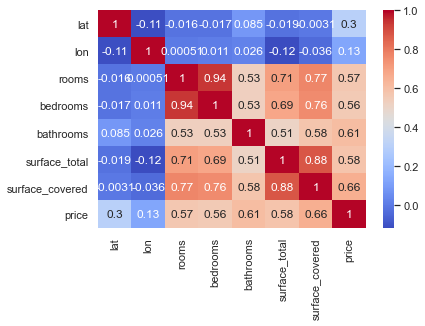

In [26]:
'''HEATMAP PARA OBSERVAR LAS CORRELACIONES'''
sns.heatmap(propiedades.corr(),cmap='coolwarm',annot=True)
plt.show()

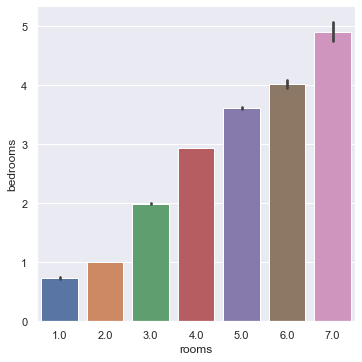

In [27]:
'''RELACION ENTRE LA CANTIDAD DE ESPACIOS Y HABITACIONES'''
sns.catplot(data=propiedades, x='rooms', y='bedrooms', kind='bar')

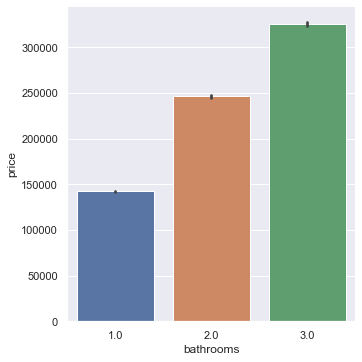

In [28]:
'''RELACION DEL PRECIO CON LA CANTIDAD DE BAÑOS'''
sns.catplot(data=propiedades, x='bathrooms', y='price',kind='bar')

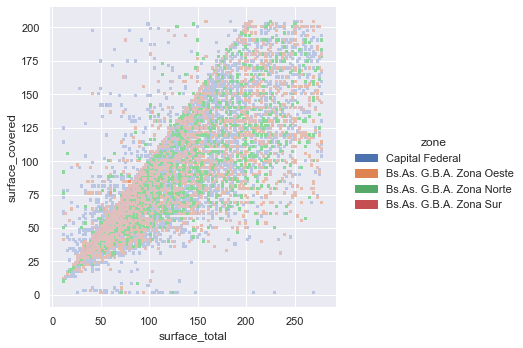

In [29]:
'''GRAFICO DE DISPERSION DE SUPERFICIE TOTAL CON LA CUBIERTA'''
sns.displot(data=propiedades, x='surface_total', y='surface_covered',hue='zone')

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [30]:
'''CANTIDAD DE PROPIEDADES POR TIPO DE PROPIEDAD'''
propiedades['property_type'].value_counts()

Departamento       75025
PH                 11171
Casa                3505
Oficina              451
Otro                  49
Lote                  12
Local comercial       11
Depósito               4
Cochera                1
Name: property_type, dtype: int64

<AxesSubplot:>

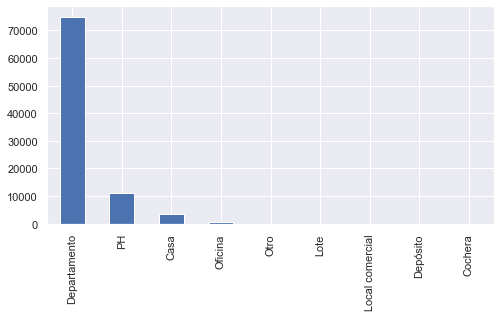

In [31]:
propiedades.property_type.value_counts().plot(kind='bar', figsize=(8,4))

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

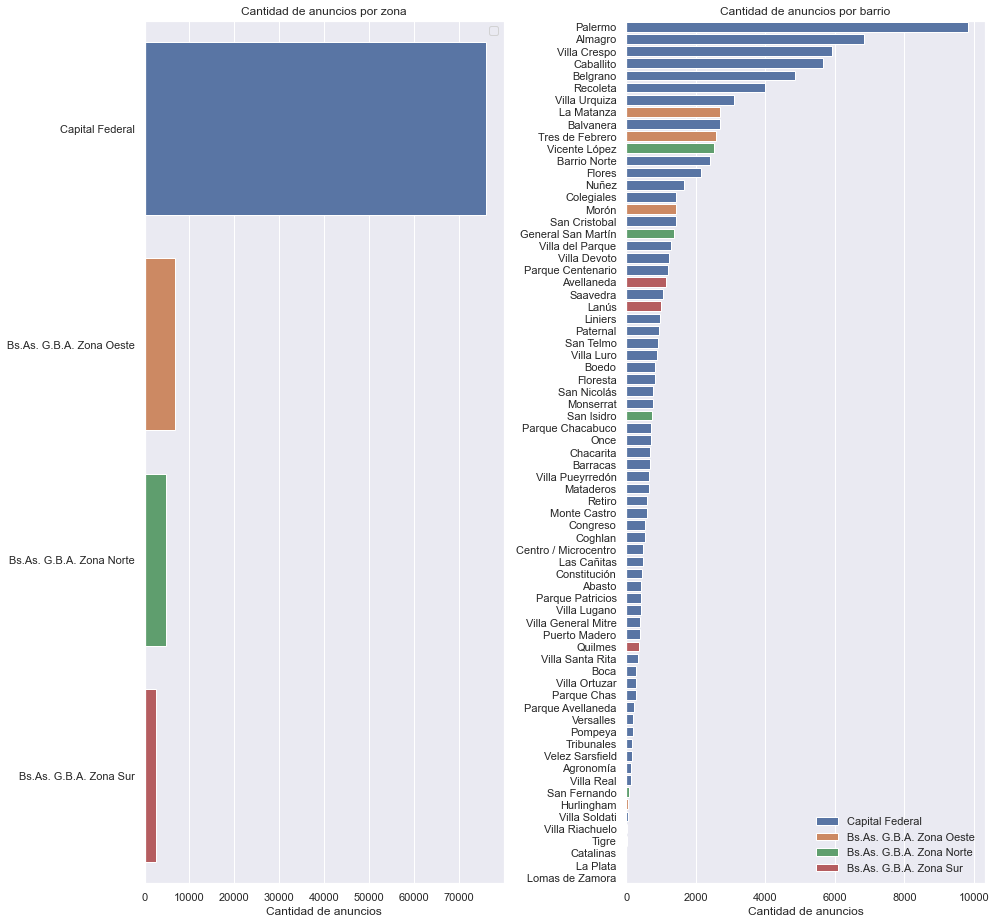

In [32]:
'''CANTIDAD DE PROPIEDADES POR ZONA'''
'''CANTIDAD DE PROPIEDADES POR BARRIO '''

plt.figure(figsize = (14,13))
plt.subplot(1,2,1)
sns.countplot(y = "zone", hue = "zone", data = propiedades, dodge=False,
              order = propiedades['zone'].value_counts().index)
plt.title("Cantidad de anuncios por zona")
plt.xlabel("Cantidad de anuncios")
plt.ylabel("")
plt.legend("")

plt.subplot(1,2,2)
sns.countplot(y = "neighborhood", hue = "zone", data = propiedades, dodge=False,
              order = propiedades['neighborhood'].value_counts().index)
plt.title("Cantidad de anuncios por barrio")
plt.xlabel("Cantidad de anuncios")
plt.ylabel("")
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()

plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [33]:
'''ANTERIORMENTE INCORPORE MODIFICACIONES EN EL DATAFRAME POR LO QUE SI FILTRO COMO SE SOLICITA
EN ESTE PUNTO NO ME COINCIDE LA CANTIDAD DE FILAS Y COLUMNAS, POR ELLO VUELVO A IMPORTAR EL DATASET'''
properties = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
properties = properties.rename(columns={'l1': 'country','l2':'zone','l3':'neighborhood'})

In [34]:
'''REALIZAMOS EL FILTRO PARA QUE NOS TOME LA ZONA Y TIPOS DE PROPIEDAD CON MAYOR CANTIDAD DE PROPIEDADES'''
ciudad_donde_hay_mas_propiedades = properties.zone.value_counts().idxmax()
property_type_max = list(properties.property_type.value_counts().nlargest(3).index)

In [35]:
'''REALIZAMOS EL FILTRO PARA QUE NOS TOME LA ZONA Y TIPOS DE PROPIEDAD CON MAYOR CANTIDAD DE PROPIEDADES'''
ciudad_donde_hay_mas_propiedades = properties.zone.value_counts().idxmax()
property_type_max = list(properties.property_type.value_counts().nlargest(3).index)
capital_federal = properties[properties.zone.isin([ciudad_donde_hay_mas_propiedades]) & properties.property_type.isin(property_type_max)]

In [36]:
capital_federal.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [37]:
'''
FILTRAMOS LAS SUP CUB > SUP TOT
IDENTIFICAMOS DUPLICADOS
'''
capital_federal = capital_federal[capital_federal.surface_covered <= capital_federal.surface_total]

duplicate_rows_df = capital_federal[capital_federal.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (1397, 19)


In [38]:
'''ELIMINAMOS DUPLICADOS'''
capital_federal = capital_federal.drop_duplicates()

In [39]:
'''ELIMINAMOS VALORES NULOS'''
capital_federal.dropna(inplace = True)

In [40]:
'''ESTADISTICOS'''
capital_federal.describe().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,74946.00,74946.00,74946.0,74946.00,74946.00,74946.00,74946.00,74946.00
mean,-34.60,-58.43,3.0,2.00,1.54,113.57,92.31,258385.11
std,0.02,0.04,1.3,1.05,0.83,1028.49,800.91,322448.11
min,-34.70,-58.53,1.0,0.00,1.00,13.00,1.00,6000.00
25%,-34.61,-58.46,2.0,1.00,1.00,49.00,44.00,125000.00
50%,-34.60,-58.43,3.0,2.00,1.00,71.00,63.00,178000.00
75%,-34.58,-58.41,4.0,3.00,2.00,110.00,95.00,278200.00
max,-34.54,-58.35,26.0,15.00,14.00,126062.00,126062.00,32434232.00


In [41]:
'''
EN ESTE PUNTO SE PROBARON DISTINTOS VALORES PARA CADA VARIABLE, FINALMENTE QUEDARON ESTOS.
'''
max_price = 750000
surf_min = 15
surf_max = 850
capital_federal = capital_federal[capital_federal.zone.isin(['Capital Federal']) & capital_federal.property_type.isin(['PH', 'Departamento', 'Casa']) & (capital_federal.price <= max_price) & (capital_federal.surface_total >= surf_min) & (capital_federal.surface_total <= surf_max)]

In [42]:
'''CANTIDAD DE PROPIEDADES POR TIPO DE PROPIEDAD'''
capital_federal.property_type.value_counts()

Departamento    60892
PH               9106
Casa             1803
Name: property_type, dtype: int64

<AxesSubplot:xlabel='price', ylabel='property_type'>

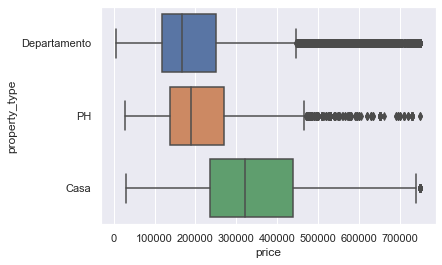

In [43]:
'''DISTRIBUCION DE PRECIO POR TIPO DE PROPIEDAD'''
sns.boxplot(data = capital_federal, x = 'price', y = 'property_type')

<AxesSubplot:xlabel='surface_total', ylabel='property_type'>

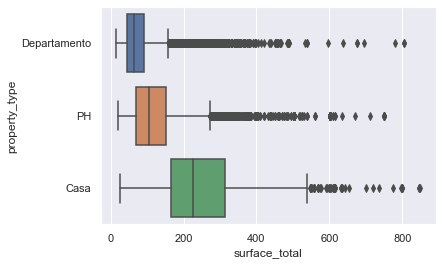

In [44]:
'''DISTRIBUCION DE SUPERFICIE POR TIPO DE PROPIEDAD'''
sns.boxplot(data = capital_federal, x = 'surface_total', y = 'property_type')

<AxesSubplot:xlabel='price', ylabel='Count'>

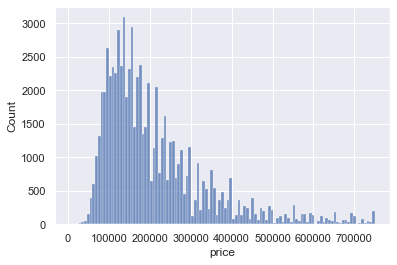

In [45]:
'''DISTRIBUCION DEL PRECIO DE LAS PROPIEDADES'''
sns.histplot(data = capital_federal, x = 'price')

<AxesSubplot:xlabel='price', ylabel='Count'>

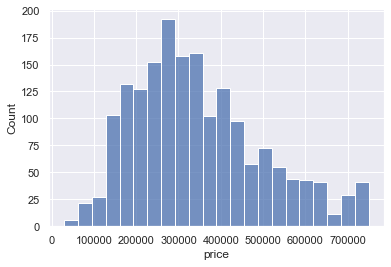

In [46]:
'''DISTRIBUCION DE PRECIO POR TIPO DE PROPIEDAD = CASA'''
casas = capital_federal['property_type'] == 'Casa'
casa = capital_federal[casas]
sns.histplot(data = casa, x = 'price')

<AxesSubplot:xlabel='price', ylabel='Count'>

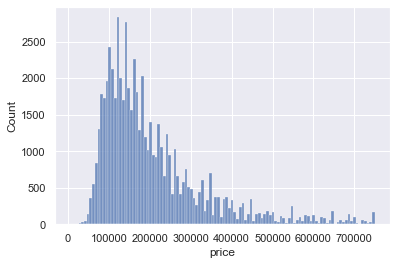

In [47]:
'''DISTRIBUCION DE PRECIO POR TIPO DE PROPIEDAD = DEPARTAMENTO'''
departamentos = capital_federal['property_type'] == 'Departamento'
departamento = capital_federal[departamentos]
sns.histplot(data = departamento, x = 'price')

<AxesSubplot:xlabel='price', ylabel='Count'>

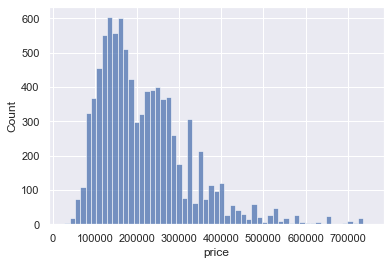

In [48]:
'''DISTRIBUCION DE PRECIO POR TIPO DE PROPIEDAD = PH'''
phs = capital_federal['property_type'] == 'PH'
ph = capital_federal[phs]
sns.histplot(data = ph, x = 'price')

In [49]:
'''PAIRPLOT PARA CONOCER LA DISTRIBUCION DE LAS VARIABLES DIVIDIDO POR TIPO DE PROPIEDAD'''
#sns.pairplot(data = capital_federal, hue = 'property_type')

'PAIRPLOT PARA CONOCER LA DISTRIBUCION DE LAS VARIABLES DIVIDIDO POR TIPO DE PROPIEDAD'

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

<AxesSubplot:>

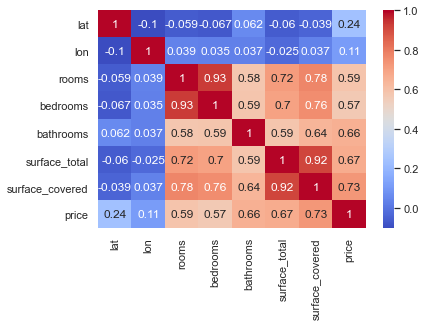

In [50]:
'''HEATMAP DE CORRELACION ENTRE VARIABLES'''
sns.heatmap(capital_federal.corr(),cmap='coolwarm',annot=True)

<AxesSubplot:>

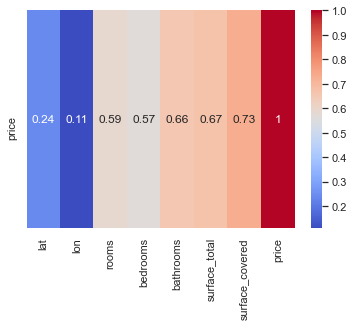

In [51]:
'''HEATMAP DE CORR CON EL PRECIO QUE ES LA VARIABLE DE INTERES'''
sns.heatmap(capital_federal.corr().loc[['price'],:],cmap='coolwarm',annot=True)

<AxesSubplot:ylabel='property_type-None'>

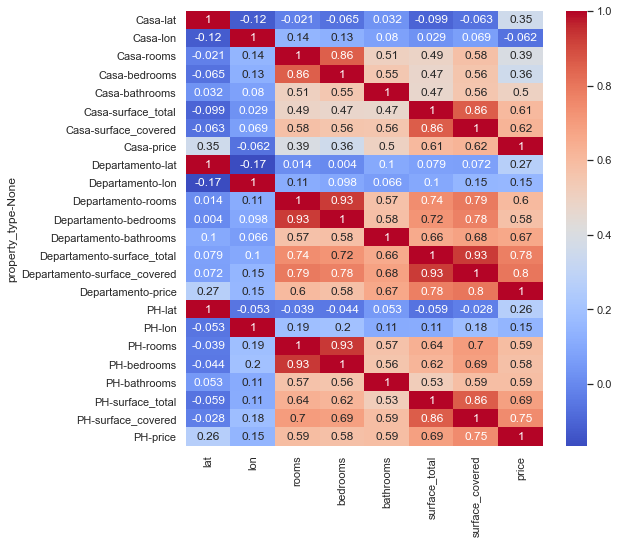

In [52]:
'''HEATMAP POR TIPO DE PROPIEDAD'''
plt.figure(figsize=(8,8))
c= capital_federal.groupby('property_type').corr()
plt.xticks(rotation = 20)
plt.yticks(rotation = 45)
sns.heatmap(c, cmap='coolwarm',annot=True)

In [53]:
#ENTRENAMOS MODELO CON LOS FILTROS REALIZADOS
'''QUEREMOS DETERMINAR EL PRECIO DE LAS PROPIEDADES POR ELLO ELEGIMOS PRECIO.
LAS VARIABLERS CON MAYOR CORRELACION AL PRECIO SON SURFACE COVERED, SURFACE TOTAL Y BATHROOMS RESPECTIVAMENTE.
DEBIDO A QUE SURFACE COVERED Y TOTAL SON VARIABLES MUY PARECIDAS Y LA CORRELACION ENTRE SURFACE TOTAL Y BATHROOMS ES SIMILAR ELEGÍ UTILIZAR ESA VARIABLE.
EN ESTE PUNTO ENTRENAMOS EL MODELO, UNA PARTE DEL DATAFRAME CON TRAIN Y LA OTRA DE TESTEO'''

'''PARA ELEGIR QUE MODELO UTILIZAR, ENTRENÉ A LOS 3 (REGRESION,KNN,TREE) Y EN BASE AL RESULTADO ELIJO EL MEJOR
LA METRICA ELEGIDA ES EL ERROR CUADRATICO MINIMO YA QUE DE LAS METRICAS ESTUDIADAS ES LA QUE MEJOR SE ADAPTA AL ANALISIS'''

'PARA ELEGIR QUE MODELO UTILIZAR, ENTRENÉ A LOS 3 (REGRESION,KNN,TREE) Y EN BASE AL RESULTADO ELIJO EL MEJOR\nLA METRICA ELEGIDA ES EL ERROR CUADRATICO MINIMO YA QUE DE LAS METRICAS ESTUDIADAS ES LA QUE MEJOR SE ADAPTA AL ANALISIS'

In [54]:
X, y = capital_federal[['bathrooms', 'surface_covered','surface_total','bedrooms', 'rooms']], capital_federal['price']

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50260, 5) (50260,) (21541, 5) (21541,)


In [57]:
'''ANALISAMOS MEJOR K PARA KNN, ANALISAMOS MEJOR DEPTH PARA ARBOL
ENTRENAMOS MODELO DE REGRESION, KNN, ARBOL'''

'ANALISAMOS MEJOR K PARA KNN, ANALISAMOS MEJOR DEPTH PARA ARBOL\nENTRENAMOS MODELO DE REGRESION, KNN, ARBOL'

Text(0, 0.5, 'RECM')

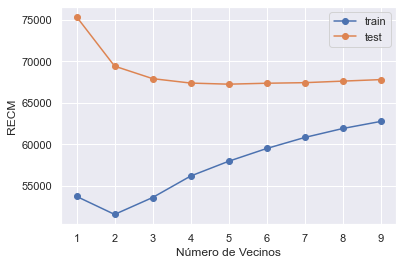

In [58]:
'''Mejor k para kNN'''

# Definimos las listas vacias para los valores de accuracy deseados
lista_recm_train = []
lista_recm_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = range(1, 10)

# Generamos en loop sobre los distintos valores de k 
for i in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=i)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_recm = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_recm = np.sqrt(mean_squared_error(y_test , y_test_pred))
    
    # Agregar la información a las listas
    lista_recm_train.append(train_recm)
    lista_recm_test.append(test_recm)

plt.plot(k_vecinos, lista_recm_train,'o-', label='train')
plt.plot(k_vecinos, lista_recm_test, 'o-', label='test' )
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('RECM')

Text(0, 0.5, 'RECM')

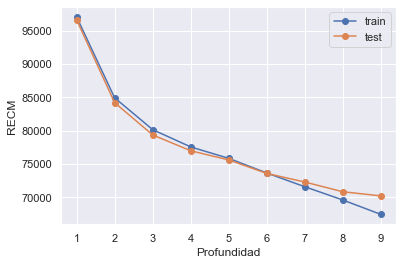

In [59]:
'''Profundidad para arbol'''

# Definimos las listas vacias para los valores de accuracy deseados
lista_recm_train = []
lista_recm_test = []

# Definimos la lista de valores de k que vamos a explorar
profundidad = range(1, 10)

# Generamos en loop sobre los distintos valores de k 
for u in profundidad:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    clf = DecisionTreeRegressor(max_depth = u, random_state = 42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_recm = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_recm = np.sqrt(mean_squared_error(y_test , y_test_pred))
    
    # Agregar la información a las listas
    lista_recm_train.append(train_recm)
    lista_recm_test.append(test_recm)

plt.plot(profundidad, lista_recm_train,'o-', label='train')
plt.plot(profundidad, lista_recm_test, 'o-', label='test' )
plt.legend()
plt.xlabel('Profundidad')
plt.ylabel('RECM')

In [60]:
'''ENTRENAMOS EL MODELO'''

'ENTRENAMOS EL MODELO'

In [61]:
'''LINEAR MODEL AS BENCHMARK, TREE REGRESSOR AND KNN'''
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [62]:
'''TRAIN'''
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 82645.81411850131
Raíz del error cuadrático medio en Test: 81346.4426493457


C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


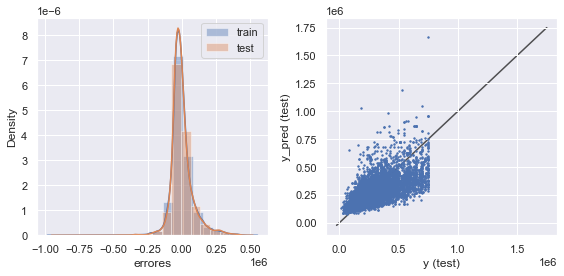

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 80158.34679548343
Raíz del error cuadrático medio en Test: 79367.37493645331


C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


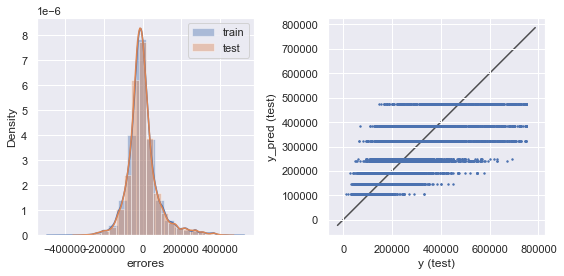

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 53560.4114343614
Raíz del error cuadrático medio en Test: 67917.43610298987


C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


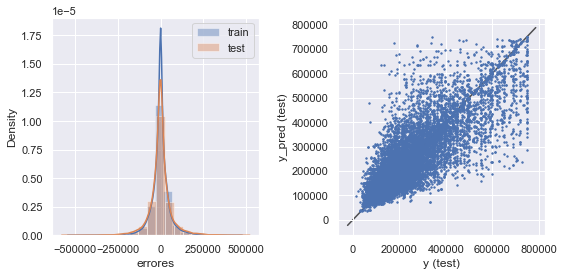

In [63]:
'''GRAFICAMOS LOS RESULTADOS'''
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Regresión lineal', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [64]:
'''COMO CONCLUSIÓN DE LOS RESULTADOS OBTENIDOS, CONSIDERO QUE UNA DISPERSIÓN DE 80000 USD ES MUY ALTA 
PARA UNA MEDIA DEL PRECIO DE 210000
POR OTRO LADO EL TRAIN Y TEST ESTIMAN VALORES MUY SIMILARES, LO QUE ME DA LA IMPRESION QUE SE PODRIA ESTAR OVERFITIANDO'''

'COMO CONCLUSIÓN DE LOS RESULTADOS OBTENIDOS, CONSIDERO QUE UNA DISPERSIÓN DE 80000 USD ES MUY ALTA \nPARA UNA MEDIA DEL PRECIO DE 210000\nPOR OTRO LADO EL TRAIN Y TEST ESTIMAN VALORES MUY SIMILARES, LO QUE ME DA LA IMPRESION QUE SE PODRIA ESTAR OVERFITIANDO'

In [1]:
capital_federal.groupby('zone')['price'].mean()

NameError: name 'capital_federal' is not defined

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

### Sprint 2: Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso
import xgboost as xgb
from wordcloud import WordCloud, STOPWORDS 

In [2]:
'''IMPORTAMOS DATA'''
properties = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [3]:
'''CAMBIAMOS NOMBRE A LAS COLUMNAS'''
propiedades = properties.rename(columns={'l1': 'country','l2':'zone','l3':'neighborhood'})
propiedades.head(2)

,start_date,end_date,created_on,lat,lon,country,zone,neighborhood,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta


**PARTE A**
**COMENZAMOS A REALIZAR EL PREPROCESAMIENTO DE DATOS.**

1. Selecciona la zona y tipo de propiedades con mayor cantidad de propiedades.
1. Eliminamos duplicados y columnas que no creo necesarias.
1. Quitamos propiedades con mayor superficie cubierta que total.
1. Rellenamos null values con la media del valor faltante teniendo en cuenta tipo de propiedad, barrio y habitaciones.
1. Quitamos outliars mediante rango intercuartílico.
1. Obtenemos caracteristicas relevantes de las propiedades de las variables titulo y descripción mediante un wordcloud.
1. Aplicamos One hot enconder para incluir en nuestros modelos a la variables categoricas.
1. Aplicamos reduccion de dimensionalidad en los barrios y tipos de propiedad. 


In [4]:
'''FILTRAMOS POR ZONA Y TIPOS DE PROPIEDAD CON MAYOR CANTIDAD DE PROPIEDADES'''
ciudad_donde_hay_mas_propiedades = propiedades.zone.value_counts().idxmax()
property_type_max = list(propiedades.property_type.value_counts().nlargest(3).index)

In [5]:
capital_federal = propiedades[propiedades.zone.isin([ciudad_donde_hay_mas_propiedades]) & propiedades.property_type.isin(property_type_max)]

In [6]:
'''IDENTIFICAMOS DUPLICADOS Y ELIMINAMOS DUPLICADOS'''
duplicate_rows_df = capital_federal[capital_federal.duplicated()]
print('Number of duplicate rows: ', duplicate_rows_df.shape)

Number of duplicate rows:  (1611, 19)


In [7]:
capital_federal = capital_federal.drop_duplicates()

In [8]:
'''ELIMINAMOS COLUMNAS INNECESARIAS'''
capital_federal = capital_federal.drop(['start_date', 'end_date','created_on','operation_type','currency'], axis = 1)

In [9]:
'''HAY PROPIEDADES CON MAYOR SUPERFICIE CUBIERTA QUE TOTAL. PROCEDEMOS A QUITARLAS'''
capital_federal.drop(capital_federal[capital_federal.surface_covered > capital_federal.surface_total].index, inplace = True)

In [10]:
'''FILTRAMOS EL DATASET'''
capital_federal = capital_federal.loc[:, ['lat','lon','description','title','rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'zone', 'neighborhood','property_type']]

**IDENTIFICAMOS NULL VALUES, LOS GRAFICAMOS PARA OBSERVAR SU DISTIBRUCIÓN.**

In [11]:
capital_federal.isna().sum()/capital_federal.shape[0]*100

lat                 4.910564
lon                 4.926274
description         0.000000
title               0.000000
rooms               0.000000
bedrooms            0.000000
bathrooms           2.400296
surface_total       9.781852
surface_covered    10.126355
price               0.000000
zone                0.000000
neighborhood        0.000000
property_type       0.000000
dtype: float64

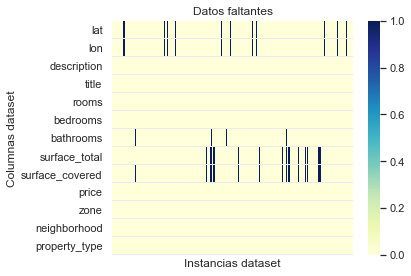

In [12]:
dat = capital_federal.isnull()
heat=sns.heatmap(dat.T, cmap='YlGnBu',xticklabels=False)
plt.title('Datos faltantes')
plt.xlabel('Instancias dataset')
plt.ylabel('Columnas dataset')
plt.tight_layout()

**DECISION DE RELLENAR LOS VALORES NULOS CON LA MEDIA DEL FEATURE TENIENDO EN CUENTA EL TIPO DE PROPIEDAD, BARRIO Y CANTIDAD DE HABITACIONES**

In [13]:
capital_federal['surface_covered'].fillna(capital_federal.groupby(['property_type','neighborhood','rooms','bedrooms'])['surface_covered'].transform(pd.Series.mean), inplace = True)
capital_federal['surface_total'].fillna(capital_federal.groupby(['property_type','neighborhood','rooms','bedrooms'])['surface_total'].transform(pd.Series.mean), inplace = True)
capital_federal['bathrooms'].fillna(capital_federal.groupby(['property_type','neighborhood','rooms','bedrooms'])['bathrooms'].transform(pd.Series.mean).round(0), inplace = True)
capital_federal.dropna(inplace=True)

In [14]:
'''CORROBORAMOS QUE NO QUEDEN NULOS'''
capital_federal.isnull().sum()

lat                0
lon                0
description        0
title              0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
zone               0
neighborhood       0
property_type      0
dtype: int64

In [15]:
'''QUITAMOS VALORES ATIPICOS. ELEGIMOS RANGO INTERCUATILICO POR LA DISTRIBUCION DE LOS DATOS'''
casas = capital_federal['property_type'] == 'Casa'
casa = capital_federal[casas]

departamentos = capital_federal['property_type'] == 'Departamento'
departamento = capital_federal[departamentos]

PHS = capital_federal['property_type'] == 'PH'
PH = capital_federal[PHS]


Q1_departamento = departamento.quantile(0.25).round(2)
Q3_departamento = departamento.quantile(0.75).round(2)
IQR_departamento = Q3_departamento - Q1_departamento
print('IQR de los departamentos es de:')
print(IQR_departamento)
capital_federal_departamentos = departamento[~((departamento < (Q1_departamento - 1.5 * IQR_departamento)) |(departamento > (Q3_departamento + 1.5 * IQR_departamento))).any(axis=1)]

Q1_casa = casa.quantile(0.25).round(2)
Q3_casa = casa.quantile(0.75).round(2)
IQR_casa = Q3_casa - Q1_casa
print('IQR de las casas es de:')
print(IQR_casa)
capital_federal_casas = casa[~((casa < (Q1_casa - 1.5 * IQR_casa)) |(casa > (Q3_casa+ 1.5 * IQR_casa))).any(axis=1)]

Q1_PH = PH.quantile(0.25).round(2)
Q3_PH = PH.quantile(0.75).round(2)
IQR_PH = Q3_PH - Q1_PH
print('IQR de los PHç es de:')
print(IQR_PH)
capital_federal_PHS = PH[~((PH < (Q1_PH - 1.5 * IQR_PH)) |(PH > (Q3_PH+ 1.5 * IQR_PH))).any(axis=1)]


capital_federal = pd.concat([capital_federal_departamentos, capital_federal_casas,capital_federal_PHS])

IQR de los departamentos es de:
lat                     0.03
lon                     0.05
rooms                   1.00
bedrooms                1.00
bathrooms               1.00
surface_total          52.00
surface_covered        43.90
price              146100.00
dtype: float64
IQR de las casas es de:
lat                     0.05
lon                     0.05
rooms                   2.00
bedrooms                1.00
bathrooms               1.00
surface_total         162.00
surface_covered       117.00
price              230000.00
dtype: float64
IQR de los PHç es de:
lat                     0.03
lon                     0.06
rooms                   1.00
bedrooms                1.00
bathrooms               1.00
surface_total          82.00
surface_covered        62.00
price              134000.00
dtype: float64


<ipython-input-15-31711e8a67db>:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  capital_federal_departamentos = departamento[~((departamento < (Q1_departamento - 1.5 * IQR_departamento)) |(departamento > (Q3_departamento + 1.5 * IQR_departamento))).any(axis=1)]
<ipython-input-15-31711e8a67db>:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  capital_federal_departamentos = departamento[~((departamento < (Q1_departamento - 1.5 * IQR_departamento)) |(departamento > (Q3_departamento + 1.5 * IQR_departamento))).any(axis=1)]
<ipython-input-15-31711e8a67db>:24: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and

In [16]:
capital_federal.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72136.000000,72136.000000,72136.000000,72136.000000,72136.00000,72136.000000,72136.000000,72136.000000
mean,-34.599332,-58.438201,2.668141,1.728748,1.34008,75.308154,64.941183,182601.262768
std,0.023138,0.035629,0.996734,0.853320,0.56930,45.936309,34.560939,92175.384230
min,-34.696419,-58.530468,1.000000,0.000000,1.00000,12.000000,1.000000,7500.000000
25%,-34.614128,-58.461205,2.000000,1.000000,1.00000,46.000000,42.000000,115000.000000
50%,-34.600283,-58.434956,3.000000,2.000000,1.00000,64.000000,56.000000,159900.000000
75%,-34.585538,-58.413336,3.000000,2.000000,2.00000,90.000000,78.076923,230000.000000
max,-34.535818,-58.353930,9.000000,5.000000,4.00000,570.000000,410.000000,800000.000000


<AxesSubplot:>

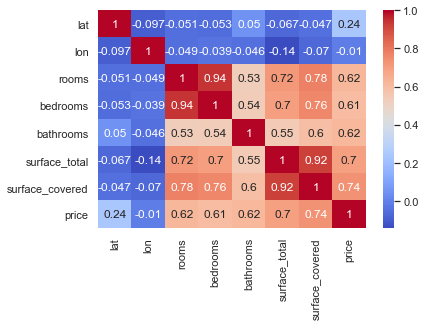

In [17]:
'''HEATMAP DE CORRELACION ENTRE VARIABLES'''
sns.heatmap(capital_federal.corr(),cmap='coolwarm',annot=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marcos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hay 72829909 palabras en el total de descripciones de los anuncios de la base


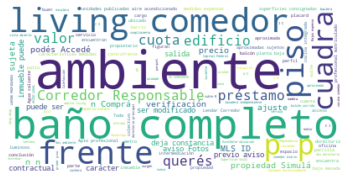

Hay 3648789 palabras en el total de descripciones de los anuncios de la base


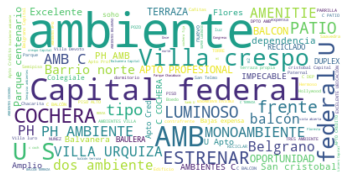

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#nltk librería de análisis de lenguaje
import nltk

#Este proceso puede hacerse antes de forma manual, descargar las stopwords de la librería nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp = ['Venta','Departamento','br', 'Almagro', 'Palermo', 'Villa crespo', 'casa', 'Depto', 'Caballito','Capital federal', 'Recoleta'] + list(stop_words_sp)

text = " ".join(x for x in capital_federal.description)
print ("Hay {} palabras en el total de descripciones de los anuncios de la base".format(len(text)))

#stop_words_sp.update(["br"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

text = " ".join(x for x in capital_federal.title)
print ("Hay {} palabras en el total de descripciones de los anuncios de la base".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [19]:
capital_federal['title']       = capital_federal['title'].str.lower()
capital_federal['title']       = capital_federal['title'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
capital_federal['description'] = capital_federal['description'].str.lower()
capital_federal['description'] = capital_federal['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

capital_federal['cochera']  = ((capital_federal['description'].str.contains('cochera|garage', na=False)) | (capital_federal['title'].str.contains('cochera|garage', na=False))).astype(int)
capital_federal['piscina']  = ((capital_federal['description'].str.contains('pileta|piscina', na=False)) | (capital_federal['title'].str.contains('pileta|piscina', na=False))).astype(int)
capital_federal['gimnasio'] = ((capital_federal['description'].str.contains('gym|gimnasio', na=False))   | (capital_federal['title'].str.contains('gym|gimnasio', na=False))).astype(int)
capital_federal['nuevo']    = ((capital_federal['description'].str.contains('nuevo|estrenar', na=False)) | (capital_federal['title'].str.contains('nuevo|estrenar', na=False))).astype(int)
capital_federal['balcon']   = ((capital_federal['description'].str.contains('balcon', na=False))         | (capital_federal['title'].str.contains('balcon', na=False))).astype(int)
capital_federal['baulera']  = ((capital_federal['description'].str.contains('baulera', na=False))        | (capital_federal['title'].str.contains('baulera', na=False))).astype(int)
capital_federal['frente']   = ((capital_federal['description'].str.contains('frente', na=False))         | (capital_federal['title'].str.contains('frente', na=False))).astype(int)
capital_federal['sum']      = ((capital_federal['description'].str.contains('sum|quincho', na=False))    | (capital_federal['title'].str.contains('sum|quincho', na=False))).astype(int)


print('Publicaciones con cocheras:', capital_federal['cochera' ].sum())
print('Publicaciones con piscina: ', capital_federal['piscina' ].sum())
print('Publicaciones con gimnaso: ', capital_federal['gimnasio'].sum())
print('Publicaciones a estrenar:  ', capital_federal['nuevo'   ].sum())
print('Publicaciones con balcon:  ', capital_federal['balcon'  ].sum())
print('Publicaciones con baulera: ', capital_federal['baulera' ].sum())
print('Publicaciones frente:      ', capital_federal['frente'  ].sum())
print('Publicaciones con SUM:     ', capital_federal['sum'     ].sum())

Publicaciones con cocheras: 20924
Publicaciones con piscina:  12239
Publicaciones con gimnaso:  5610
Publicaciones a estrenar:   14851
Publicaciones con balcon:   39993
Publicaciones con baulera:  10166
Publicaciones frente:       38638
Publicaciones con SUM:      15181


In [20]:
'''ACA NOTAMOS DIFERENCIA DE PRECIO ENTRE PROPIEDADES CON PISCINA Y LAS QUE NO'''
capital_federal.groupby(['piscina']).mean()[['price']].sort_values('price')

,price
piscina,
0,176677.045127
1,211594.061525


In [21]:
'''ACA NOTAMOS DIFERENCIA DE PRECIO ENTRE PROPIEDADES CON BALCON Y LAS QUE NO'''
capital_federal.groupby(['balcon']).mean()[['price']].sort_values('price')

,price
balcon,
0,168289.661824
1,194103.720426


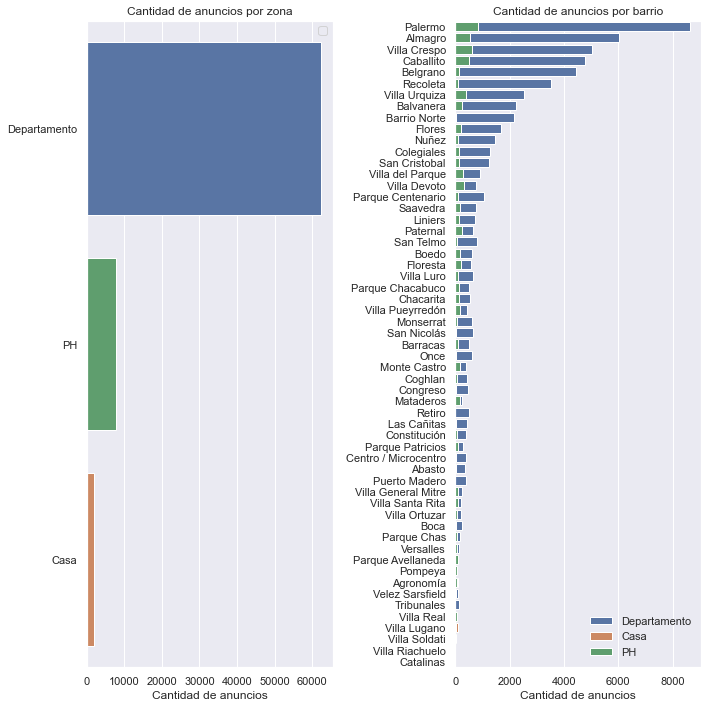

In [22]:
'''CANTIDAD DE PROPIEDADES POR ZONA'''
'''CANTIDAD DE PROPIEDADES POR BARRIO '''

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
sns.countplot(y = "property_type", hue = "property_type", data = capital_federal, dodge=False,
              order = capital_federal['property_type'].value_counts().index)
plt.title("Cantidad de anuncios por zona")
plt.xlabel("Cantidad de anuncios")
plt.ylabel("")
plt.legend("")

plt.subplot(1,2,2)
sns.countplot(y = "neighborhood", hue = "property_type", data = capital_federal, dodge=False,
              order = capital_federal['neighborhood'].value_counts().index)
plt.title("Cantidad de anuncios por barrio")
plt.xlabel("Cantidad de anuncios")
plt.ylabel("")
plt.legend(loc='lower right', frameon=False)

plt.tight_layout()

plt.show()

**ACÁ APLICO ONE HOT ENCODER PARA UTILIZAR NUESTRAS VARIABLES CATEGÓRICAS**

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc_neighborhood = OneHotEncoder(handle_unknown='ignore')
enc_property_type = OneHotEncoder(handle_unknown='ignore')

In [24]:
neighborhood_t = enc_neighborhood.fit_transform(capital_federal[["neighborhood"]]).toarray()
property_type_t = enc_property_type.fit_transform(capital_federal[["property_type"]]).toarray()

**ACA APLICO REDUCCION DE DIMENSIONAL CON PCA**

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
neighborhood = pca.fit_transform(neighborhood_t)
pca_prop_type = PCA(n_components=2)
property_type = pca_prop_type.fit_transform(property_type_t)

In [26]:
'''CAMBIAMOS NUESTROS DATOS DE DF A NUMPY PARA PODER CONCATENAR CON PCA'''
otros_datos = capital_federal[['lat', 'lon','bathrooms','surface_covered','surface_total','bedrooms','rooms','cochera','balcon','frente','piscina', 'price']]
otros_datos.shape

(72136, 12)

In [27]:
otros_datos_np = otros_datos.to_numpy()
otros_datos_np.shape

(72136, 12)

In [28]:
cf = np.concatenate([neighborhood,property_type,otros_datos_np], axis=1)
capital_federal = pd.DataFrame(cf)

**PARTE B**
Entrenamos arbol de decisión con los parametros del sprint 1 pero con el preprocesamiento del sprint 2 y observamos resultados obtenidos.

In [29]:
'''SELECCIONAMOS NUESTRAS X, Y'''
X, y = capital_federal[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], capital_federal[19]

In [30]:
'''APLICAMOS TRAIN, TEST, SPLIT, ESTANDARIZAMOS LOS DATOS Y CONTROLAMOS LA PROPIRCIÓN DE TRAIN Y TEST'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [31]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [32]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  182986.8809716772
Proporcion de etiquetas positiva en los datos de Test:  181885.13212927757


In [33]:
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

In [34]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [35]:
y_train_pred_tree_1 = tree_regressor.predict(X_train)
y_test_pred_tree_1 = tree_regressor.predict(X_test)

In [36]:
'''Resultados de arbol con nuevo preprocesamiento y parametros de sprint 1'''
rmse_train_tree_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_1))
rmse_test_tree_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_1))
print(f'Raíz del error cuadrático medio en Train tree: {rmse_train_tree_1.round(2)}')
print(f'Raíz del error cuadrático medio en Test tree: {rmse_test_tree_1.round(2)}')

Raíz del error cuadrático medio en Train tree: 57392.86
Raíz del error cuadrático medio en Test tree: 56782.99


**OBSERVACIÓN DE RESULTADOS**

* Luego de observar los resultados determinamos han mejorado de manera considerable debido a la mayor presición a la hora de realizar el preprocesamiento. 

**Para comenzar con la parte C del proyecto procedemos a dividir nuestro dataset en train, test, split.**

**BENCHMARK**

In [37]:
'''ENTRENAMOS NUESTRO MODELO BASE'''
linear_model = LinearRegression()

In [38]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [39]:
'''PREDECIMOS NUESTRO MODELO BASE'''
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

In [40]:
'''OBSERVAMOS RESULTADOS DE NUESTRO MODELO BASE'''
rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print(f'Raíz del error cuadrático medio de linear model en Train: {rmse_train_linear.round(2)}')
print(f'Raíz del error cuadrático medio de linear model en Test: {rmse_test_linear.round(2)}')

Raíz del error cuadrático medio de linear model en Train: 46915.73
Raíz del error cuadrático medio de linear model en Test: 46712.82


In [41]:
'''FEATURE IMPORTANCES'''
print('The intercept is ' + str(linear_model.intercept_.round(2)))
print('The score is ' + str(linear_model.score(X_test, y_test).round(3)))
importance_lineal = linear_model.coef_.round(2)
for i,v in enumerate(importance_lineal):
	print('Feature: %0d, Score: %.5f' % (i,v))

The intercept is 182986.88
The score is 0.739
Feature: 0, Score: 8826.65000
Feature: 1, Score: -691.77000
Feature: 2, Score: -3585.18000
Feature: 3, Score: -364.52000
Feature: 4, Score: -1551.31000
Feature: 5, Score: 9129.90000
Feature: 6, Score: -6410.30000
Feature: 7, Score: -8362.56000
Feature: 8, Score: 19397.43000
Feature: 9, Score: 3743.94000
Feature: 10, Score: 15673.56000
Feature: 11, Score: 30789.21000
Feature: 12, Score: 24515.80000
Feature: 13, Score: -2924.05000
Feature: 14, Score: 16629.13000
Feature: 15, Score: 13518.90000
Feature: 16, Score: 3970.47000
Feature: 17, Score: -764.61000
Feature: 18, Score: 9796.77000


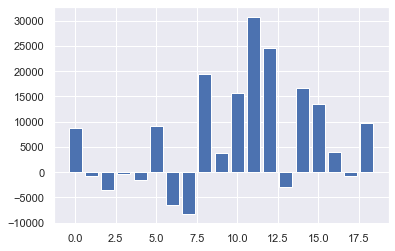

In [42]:
'''GRAFICO FEATURE IMPORTANCES'''
plt.bar([x for x in range(len(importance_lineal))], importance_lineal)
plt.show()

In [43]:
'''APLICAMOS REGULARIZACION DE LASSO'''

'APLICAMOS REGULARIZACION DE LASSO'

In [44]:
from sklearn.linear_model import Lasso

In [45]:
lasso = Lasso()

In [46]:
param_dist_lasso = {'alpha': [50, 100]}

In [47]:
reg_lasso = RandomizedSearchCV(lasso, param_dist_lasso,n_iter=10, cv=3).fit(X_train,y_train)

C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [48]:
'''PREDECIMOS'''
y_train_pred_lasso = reg_lasso.predict(X_train)
y_test_pred_lasso = reg_lasso.predict(X_test)

In [49]:
'''OBSERVAMOS RESULTADOS DE NUESTRO MODELO LASSO'''
rmse_trainlasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_testlasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
print(f'Raíz del error cuadrático medio en Train: {rmse_trainlasso.round(2)}')
print(f'Raíz del error cuadrático medio en Test: {rmse_testlasso.round(2)}')

Raíz del error cuadrático medio en Train: 46917.27
Raíz del error cuadrático medio en Test: 46716.83


In [50]:
'''FEATURE IMPORTANCES'''
print('The intercept is ' + str(reg_lasso.best_estimator_.intercept_.round(2)))
print('The score is ' + str(reg_lasso.score(X_test, y_test).round(3)))
importance_lasso = reg_lasso.best_estimator_.coef_.round(2)
for i,v in enumerate(importance_lasso):
	print('Feature: %0d, Score: %.5f' % (i,v))

The intercept is 182986.88
The score is 0.739
Feature: 0, Score: 8807.63000
Feature: 1, Score: -641.76000
Feature: 2, Score: -3533.59000
Feature: 3, Score: -279.40000
Feature: 4, Score: -1480.73000
Feature: 5, Score: 9101.84000
Feature: 6, Score: -6308.01000
Feature: 7, Score: -8205.14000
Feature: 8, Score: 19326.77000
Feature: 9, Score: 3708.02000
Feature: 10, Score: 15659.30000
Feature: 11, Score: 30718.61000
Feature: 12, Score: 24361.00000
Feature: 13, Score: -1976.03000
Feature: 14, Score: 15775.24000
Feature: 15, Score: 13495.05000
Feature: 16, Score: 3927.42000
Feature: 17, Score: -696.85000
Feature: 18, Score: 9773.33000


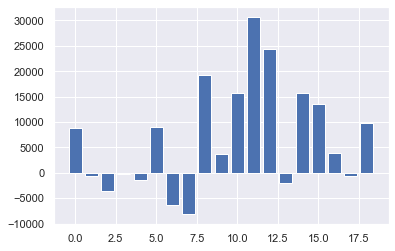

In [51]:
'''GRAFICO FEATURE IMPORTANCES'''
plt.bar([x for x in range(len(importance_lasso))], importance_lasso)
plt.show()

**SE PROCEDE A ENTRENAR MODELO KNN Y TREE Y MEDIR RESULTADOS.**
* LUEGO VAMOS A ENTRENAR UN MODELO XGBOOST, RANDOMFOREST PARA CONOCER SI NOS MEJORA LOS RESULTADOS
* PARA TODOS UTILIZAMOS OPTIMIZACION DE HIPERPARAMETROS MEDIAN RANDOMIZED SEARCH


**KNN**

1. Tomé la decisión de no evaluar tantos hiperparametros ya que el modelo me demora muchísimo en entrenar, graficar errores y los resultados obtenidos no son buenos.
1. La única manera que el modelo obtenga un error parecido al resto, es estableciendo pocos hiperparametros, de lo contrario el sesgo y la varinza aumentan considerablemente.

In [52]:
'''SELECCIONAMOS NUESTRAS X, Y'''
X, y = capital_federal[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], capital_federal[19]

In [53]:
'''APLICAMOS TRAIN, TEST, SPLIT, ESTANDARIZAMOS LOS DATOS Y CONTROLAMOS LA PROPIRCIÓN DE TRAIN Y TEST'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [54]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [55]:
knn = KNeighborsRegressor()

In [56]:
'''CONSIDERO LOS SIGUIENTES HIPERPARAMETROS LOS DE MAYOR PESO PARA EVALUAR EL MODELO KNN'''
param_dist = {'n_neighbors':[1, 5, 9]}

In [57]:
'''APLICAMOS RANDOMIZEDSEARCHCV PARA KNN'''
model_knn = RandomizedSearchCV(knn, param_dist,n_iter=10, random_state=42, cv=2).fit(X_train, y_train)

C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [58]:
'''OBSERVAMOS LOS MEJORES PARAMETROS Y EL MEJOR SCORE'''
print("Mejores parametros del modelo knn: "+str(model_knn.best_params_))
print("Mejor Score: "+str(model_knn.best_score_.round(2))+'\n')

Mejores parametros del modelo knn: {'n_neighbors': 5}
Mejor Score: 0.8



In [59]:
'''REALIZAMOS LAS PREDICCIONES'''
y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)

In [60]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train KNN: {rmse_train_knn.round(2)}')
print(f'Raíz del error cuadrático medio en Test KNN: {rmse_test_knn.round(2)}')

Raíz del error cuadrático medio en Train KNN: 29745.2
Raíz del error cuadrático medio en Test KNN: 37242.53


Modelo: KNN
Raíz del error cuadrático medio en Train KNN: 29745.2
Raíz del error cuadrático medio en Test KNN: 37242.53


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


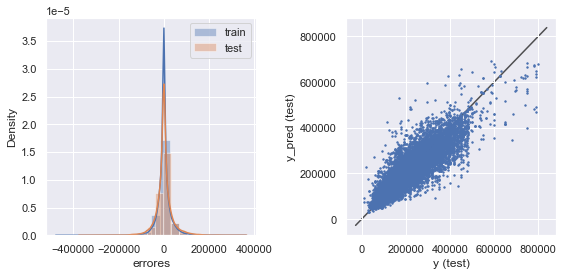

In [61]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''

print('Modelo: KNN')
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_pred_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_pred_knn))
print(f'Raíz del error cuadrático medio en Train KNN: {rmse_train_knn.round(2)}')
print(f'Raíz del error cuadrático medio en Test KNN: {rmse_test_knn.round(2)}')
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_knn, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_knn, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_knn, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

**LA ÚNICA FORMA DE QUE EL MODELO KNN OBTENGA UN ERROR PARECIDO AL RESTO DE MODELOS ES PONIENDO POCOS HIPERPARAMETROS, DE LO CONTRARIO EL SESGO Y VARIANZA AUMENTAN CONSIDERABLEMENTE**

**ARBOL**

In [62]:
'''SELECCIONAMOS NUESTRAS X, Y'''
X, y = capital_federal[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], capital_federal[19]

In [63]:
'''DIVIDIMOS EN TRAIN, TEST, SPLIT, ESTANDARIZAMOS Y APLICAMOS TREE'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [64]:
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [65]:
'''ARBOL DE DECISION'''
tree = DecisionTreeRegressor()

In [66]:
'''CONSIDERO LOS SIGUIENTES HIPERPARAMETROS LOS DE MAYOR PESO PARA EVALUAR EL MODELO TREE'''
param_distributions = {'max_depth':[2,4,6,8,11,13],
                      'min_samples_split' : np.arange(2,5),
                      'min_samples_leaf': np.arange(2,5)}

In [67]:
'''EVALUACION DE HIPERPARAMETROS ARBOL'''
model_tree = RandomizedSearchCV(tree, param_distributions,n_iter=30, random_state=42, cv=4).fit(X_train, y_train)

In [68]:
'''OBSERVAMOS LOS MEJORES PARAMETROS Y EL MEJOR SCORE'''
print("Mejores parametros del modelo tree: "+str(model_tree.best_params_))
print("Mejor Score: "+str(model_tree.best_score_.round(3))+'\n')

Mejores parametros del modelo tree: {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 13}
Mejor Score: 0.83



In [69]:
'''REALIZAMOS LAS PREDICCIONES'''
y_train_pred_tree = model_tree.predict(X_train)
y_test_pred_tree = model_tree.predict(X_test)

In [70]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
print(f'Raíz del error cuadrático medio en Train tree: {rmse_train_tree.round(2)}')
print(f'Raíz del error cuadrático medio en Test tree: {rmse_test_tree.round(2)}')

Raíz del error cuadrático medio en Train tree: 26920.53
Raíz del error cuadrático medio en Test tree: 36297.65


In [71]:
'''FEATURE IMPORTANCES'''
importance_tree = model_tree.best_estimator_.feature_importances_
for i,v in enumerate(importance_tree):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00338
Feature: 1, Score: 0.00491
Feature: 2, Score: 0.00229
Feature: 3, Score: 0.00210
Feature: 4, Score: 0.00138
Feature: 5, Score: 0.00971
Feature: 6, Score: 0.00161
Feature: 7, Score: 0.00131
Feature: 8, Score: 0.12676
Feature: 9, Score: 0.06437
Feature: 10, Score: 0.01667
Feature: 11, Score: 0.15878
Feature: 12, Score: 0.54443
Feature: 13, Score: 0.00371
Feature: 14, Score: 0.00490
Feature: 15, Score: 0.03621
Feature: 16, Score: 0.00349
Feature: 17, Score: 0.00203
Feature: 18, Score: 0.01198


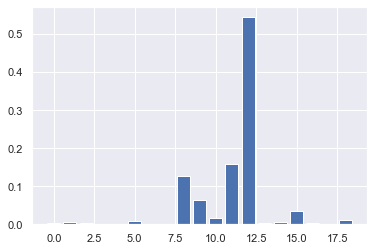

In [72]:
''' GRAFICO FEATURE IMPORTANCES'''
plt.bar([x for x in range(len(importance_tree))], importance_tree)
plt.show()

**EL MODELO DE ARBOL ESTA EN BUEN CAMINO DE SER UN MODELO CON BUENAS PREDICCIONES.**
* ES NECESARIO REDUCIR LA VARIANZA Y EL SESGO.
* SE INTENTO REALIZANDO VARIACIONES EN LOS HIPERPARAMETROS Y NO SE LOGRO REDUCIRLO.
* UNA POSIBLE SOLUCION SERÍA LA CREACION DE NUEVAS METRICAS.

**XGBOOST**

In [73]:
import xgboost as xgb

In [74]:
'''SELECCIONAMOS NUESTRAS X, Y'''
X, y = capital_federal[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], capital_federal[19]

In [75]:
'''DIVIDIMOS EN TRAIN, TEST, SPLIT, ESTANDARIZAMOS Y APLICAMOS MODELO XGB'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [76]:
scl_xgb = StandardScaler()
X_train = scl_xgb.fit_transform(X_train)
X_test = scl_xgb.transform(X_test)

In [77]:
xgb = xgb.XGBRegressor()

In [78]:
param = {'n_estimators':[2,4,6,8,10],
         'eta': [0.1,0.5,1],
         'max_depth': [3,5,7,9,12]}

In [79]:
model_xgb = RandomizedSearchCV(xgb, param,n_iter=10, random_state=42, cv=4).fit(X_train,y_train)

In [80]:
'''OBSERVAMOS LOS MEJORES PARAMETROS Y EL MEJOR SCORE'''
print("Mejores parametros del modelo xgb: "+str(model_xgb.best_params_))
print("Mejor Score: "+str(model_xgb.best_score_.round(3))+'\n')

Mejores parametros del modelo xgb: {'n_estimators': 10, 'max_depth': 9, 'eta': 1}
Mejor Score: 0.829



In [81]:
'''REALIZAMOS LAS PREDICCIONES'''
y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)

In [82]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
print(f'Raíz del error cuadrático medio en Train xgb: {rmse_train_xgb.round(2)}')
print(f'Raíz del error cuadrático medio en Test xgb: {rmse_test_xgb.round(2)}')

Raíz del error cuadrático medio en Train xgb: 26783.54
Raíz del error cuadrático medio en Test xgb: 36569.89


In [83]:
'''FEATURE IMPORTANCES'''
importances_xgb = model_xgb.best_estimator_.feature_importances_.round(4)
for i,v in enumerate(importances_xgb):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01100
Feature: 1, Score: 0.04120
Feature: 2, Score: 0.01440
Feature: 3, Score: 0.01430
Feature: 4, Score: 0.01160
Feature: 5, Score: 0.06460
Feature: 6, Score: 0.01190
Feature: 7, Score: 0.00560
Feature: 8, Score: 0.04790
Feature: 9, Score: 0.02630
Feature: 10, Score: 0.03120
Feature: 11, Score: 0.09510
Feature: 12, Score: 0.37220
Feature: 13, Score: 0.01060
Feature: 14, Score: 0.01500
Feature: 15, Score: 0.15130
Feature: 16, Score: 0.01090
Feature: 17, Score: 0.00540
Feature: 18, Score: 0.05960


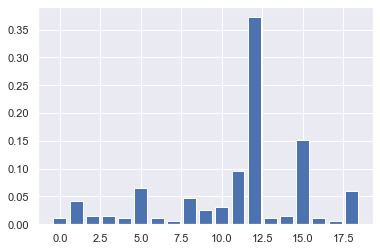

In [84]:
'''GRAFICO FEATURE IMPORTANCES'''
plt.bar([x for x in range(len(importances_xgb))], importances_xgb)
plt.show()

**INTERESANTE MODELO YA QUE MEJORA UN POCO NUESTRO ARBOL.**
+ REDUCE UN POCO LA VARIANZA
+ PERO AL IGUAL QUE EL ARBOL SERÍA NECESARIO REALIZAR MODIFICACIONES PARA REDUCIR SESGO Y VARIANZA.

**RANDOM FOREST**

In [85]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
'''SELECCIONAMOS NUESTRAS X, Y'''
X, y = capital_federal[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], capital_federal[19]

In [87]:
'''DIVIDIMOS EN TRAIN, TEST, SPLIT, ESTANDARIZAMOS Y APLICAMOS MODELO XGB'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [88]:
scl_forest = StandardScaler()
X_train = scl_forest.fit_transform(X_train)
X_test = scl_forest.transform(X_test)

In [89]:
forest = RandomForestRegressor()

In [90]:
'''HIPERPARAMETROS DE NUESTRO RANDOM FOREST'''
param = {'max_depth': [3,9,13,15],
         'n_estimators' : [50],
        'max_features': ['auto', 'sqrt', 'log2']}

In [91]:
model_forest = RandomizedSearchCV(forest, param,n_iter=10, random_state=42, cv=4, n_jobs = -1).fit(X_train,y_train)

In [92]:
print("Mejores parametros del modelo random forest: "+str(model_forest.best_params_))
print("Mejor Score: "+str(model_forest.best_score_.round(3))+'\n')

Mejores parametros del modelo random forest: {'n_estimators': 50, 'max_features': 'auto', 'max_depth': 15}
Mejor Score: 0.889



In [93]:
'''REALIZAMOS PREDICCIONES'''
y_train_pred_forest = model_forest.predict(X_train) 
y_test_pred_forest = model_forest.predict(X_test)

In [94]:
'''EVALUAMOS MEDIANTE EL ERROR CUADRATICO MEDIO, METRICA UTILIZADA A LO LARGO DEL PROYECTO PARA COMPARAR RESULTADOS.'''
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_pred_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_pred_forest))
print(f'Raíz del error cuadrático medio en Train xgb: {rmse_train_forest.round(2)}')
print(f'Raíz del error cuadrático medio en Test xgb: {rmse_test_forest.round(2)}')

Raíz del error cuadrático medio en Train xgb: 17729.4
Raíz del error cuadrático medio en Test xgb: 29431.76


In [95]:
'''FEATURE IMPORTANCES'''
forest_importances = model_forest.best_estimator_.feature_importances_.round(4)
for i,v in enumerate(forest_importances):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00540
Feature: 1, Score: 0.00400
Feature: 2, Score: 0.00410
Feature: 3, Score: 0.00310
Feature: 4, Score: 0.00350
Feature: 5, Score: 0.00930
Feature: 6, Score: 0.00210
Feature: 7, Score: 0.00170
Feature: 8, Score: 0.12830
Feature: 9, Score: 0.06860
Feature: 10, Score: 0.01730
Feature: 11, Score: 0.36090
Feature: 12, Score: 0.32220
Feature: 13, Score: 0.00420
Feature: 14, Score: 0.00590
Feature: 15, Score: 0.03680
Feature: 16, Score: 0.00450
Feature: 17, Score: 0.00340
Feature: 18, Score: 0.01460


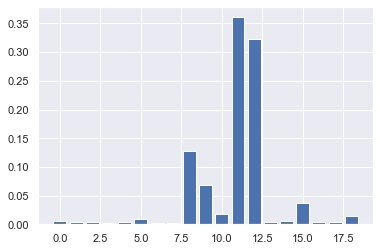

In [96]:
'''GRAFICO FEATURE IMPORTANCES'''
plt.bar([x for x in range(len(forest_importances))], forest_importances)
plt.show()

In [97]:
'''Best estimator of the forest 47'''
tree_47 = model_forest.best_estimator_.estimators_[47]
print(tree_47)

DecisionTreeRegressor(max_depth=15, max_features='auto',
                      random_state=1650906826)


In [98]:
'''Best estimator of the forest 25'''
tree_25 = model_forest.best_estimator_.estimators_[25]
print(tree_25)

DecisionTreeRegressor(max_depth=15, max_features='auto',
                      random_state=1473135549)


In [99]:
'''Ambos arboles elegidos alazar, obtengo los mismos resultados de los hiperparametros evaluados. Profundidad de 13, y max_features: auto
No se que otra evaluación de los arboles puedo realizar'''

'Ambos arboles elegidos alazar, obtengo los mismos resultados de los hiperparametros evaluados. Profundidad de 13, y max_features: auto\nNo se que otra evaluación de los arboles puedo realizar'

**MODELO SUMAMENTE ATRACTIVO YA QUE:**
* OBTUVIMOS EL MENOR SESGO
* SIN EMBARGO SERÍA NECESARIO SEGUIR TRABAJANDO EN VARIABLES NUEVAS QUE AYUDEN A REDUCIR LOS MISMOS.

**ANALISIS DE LOS ERORRES DEL MODELO**

Modelo: Tree regressor
Raíz del error cuadrático medio en Train: 57392.863439004825
Raíz del error cuadrático medio en Test: 56782.988241001796


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


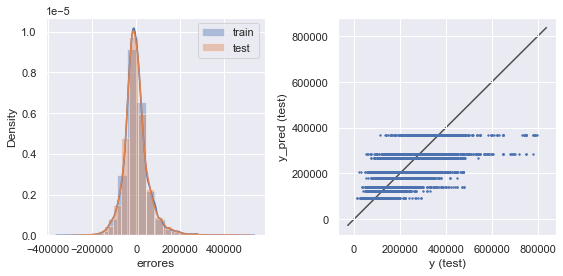

Modelo: Linear Model
Raíz del error cuadrático medio en Train: 46915.73061928046
Raíz del error cuadrático medio en Test: 46712.81765904447


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


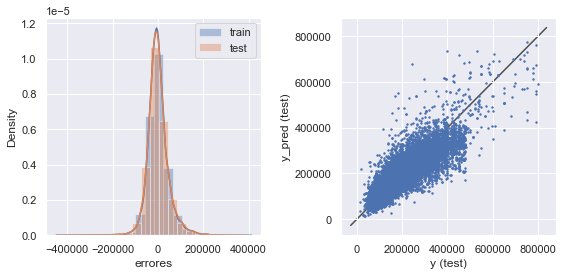

Modelo: Regularization lasso
Raíz del error cuadrático medio en Train: 46917.27199985204
Raíz del error cuadrático medio en Test: 46716.83151084388


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


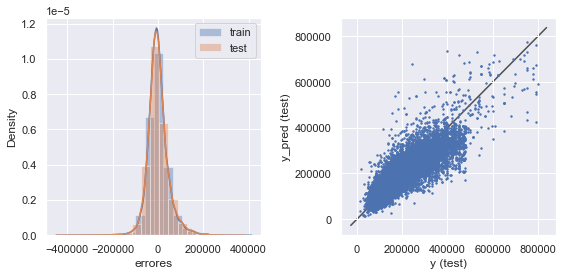

Modelo: Tree model
Raíz del error cuadrático medio en Train: 26920.53319929897
Raíz del error cuadrático medio en Test: 36297.64749055917


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


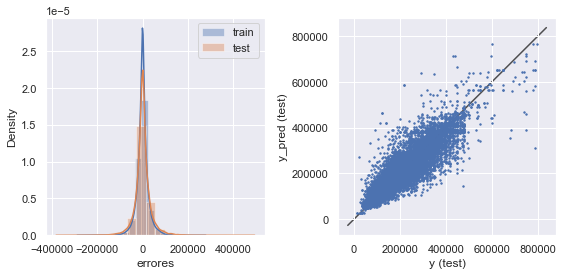

Modelo: XGBoost
Raíz del error cuadrático medio en Train: 26783.536483153373
Raíz del error cuadrático medio en Test: 36569.893361669856


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


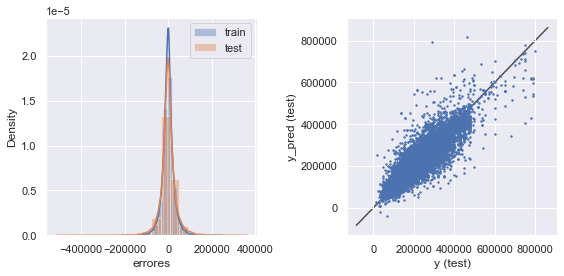

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 17729.401808508406
Raíz del error cuadrático medio en Test: 29431.755974680786


C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\miniconda3\envs\marcos\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


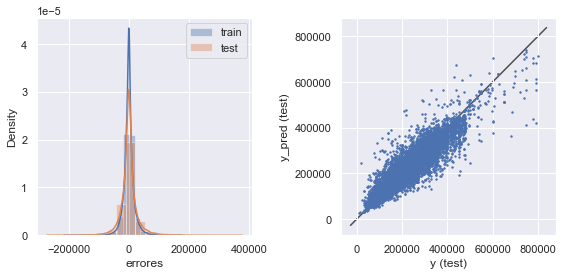

In [100]:
'''GRAFICAMOS LOS ERRORES, LA DISPERSIÓN DE CADA UNO DE LOS MODELOS ANALIZADOS.'''
modelos = ['Tree regressor', 'Linear Model', 'Regularization lasso','Tree model', 'XGBoost', 'Random Forest']

for i, model in enumerate([tree_regressor, linear_model,reg_lasso, model_tree, model_xgb, model_forest]):
    for pred_train, y_train_pred in enumerate([y_train_pred_tree_1,y_train_pred_linear,y_train_pred_lasso,y_train_pred_tree,y_train_pred_xgb,y_train_pred_forest]):
        pred_train = model.predict(X_train)
        for pred_test, y_test_pred in enumerate([y_test_pred_tree_1,y_test_pred_linear,y_test_pred_lasso,y_test_pred_tree,y_test_pred_xgb,y_test_pred_forest]): 
            pred_test = model.predict(X_test)
            for rmse_train in enumerate([rmse_train_tree_1,rmse_train_linear, rmse_trainlasso,rmse_train_tree,rmse_train_xgb,rmse_train_forest]):
                rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
                for rmse_test in enumerate([rmse_test_tree_1,rmse_test_linear, rmse_testlasso,rmse_test_tree,rmse_test_xgb,rmse_test_forest]):
                    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))    
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - pred_train, bins = 20, label = 'train')
    sns.distplot(y_test - pred_test, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,pred_test, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

**Metodología**

1. Para ajustar el sesgo y varianza deberíamos crear nuevas metricas.
1. He seguido los pasos metodológicos de analisis.
1. A nivel metodología no se que otra cosa debería ajustar. Leí articulos, probé distintas cosas y no encuentro respuesta.

**Desafío opcional**

1. Entiendo la potencia de los clusters pero en este caso en particular no veo en donde podría ayudarme, por ello no lo aplico.


**Luego de haber realizado el entrenamiento de todos los modelos y observar resultados concluimos que:**

1. El modelo ha mejorado considerablemente frente a los resultados del sprint 1.
1. En el sprint 2 incluimos variables que no estaban en el sprint 1.
1. Incluimos variables categóricas sabiendo el peso que tienen a la hora de entrenar el modelo.
1. Aplicar la optimización de hiperparametros ha mejorado considerablemente los resultados.
1. Considero que el error en todos los modelos sigue siendo muy grande y hay que seguir mejorando el mismo.

**Acciones a realizar para mejorar los resultados obtenidos**

1. Conocer el publico objetivo del cliente.
1. Debemos establecer cual es el objetivo a lograr, para determinar sesgo y varianza tolerados.
1. Si sus productos y cliente objetivo estan enfocados en departamentos, deberíamos crear un modelo especifico para este tipo de propiedad.
1. En base a la determinación de los objetivos debemos mejorar el sesgo y la varianza tolerados.
1. Utilizar los resultados obtenidos en el wordcloud y observar si nos sirven como metricas.
1. Descartar modelos que no nos aportan resultados optimos.